# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('./datasets/tip.csv')
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


## HIỂU DỮ LIỆU

1. Đọc dữ liệu
2. Xoá cột `Unnamed: 0`
3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [46]:
# 1. Đọc dữ liệu
# 2. Xoá cột `Unnamed: 0`
# 3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
print(df.shape)
# 4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
print(df.info())
# 5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
gender_counts = df['sex'].value_counts()
print(f"Ty le nam - nu: {gender_counts['Male'] * 100 / df.shape[0]:.2f}% - {gender_counts['Female'] * 100 / df.shape[0]:.2f}%")
# 6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
smoker_counts = df['smoker'].value_counts()
print(f"So nguoi hut thuoc: {smoker_counts['Yes']}, chiem ty le: {smoker_counts['Yes'] * 100 / df.shape[0]:.2f}%")
# 7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
day_counts = df['day'].value_counts()
most_frequent_day = day_counts.idxmax()
most_frequent_day_percentage = day_counts.max() * 100 / df.shape[0]
print(f"Ngay trong tuan khach hang dung bua nhieu nhat: {most_frequent_day}, chiem ty le: {most_frequent_day_percentage:.2f}%")
# 8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
time_counts = df.time.value_counts()
most_frequent_time = time_counts.idxmax()
print(f"Nha hang phuc vu bua an nhieu nhatt: {most_frequent_time}")
# 9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
print(f"Nhom khach hang dung bua nhieu nhat co: {df['size'].max()} nguoi")
# 10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?
print(f"Trung binh nha hang phuc vu {df['size'].mean():.2f} khach")

(244, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB
None
Ty le nam - nu: 64.34% - 35.66%
So nguoi hut thuoc: 93, chiem ty le: 38.11%
Ngay trong tuan khach hang dung bua nhieu nhat: Sat, chiem ty le: 35.66%
Nha hang phuc vu bua an nhieu nhatt: Dinner
Nhom khach hang dung bua nhieu nhat co: 6 nguoi
Trung binh nha hang phuc vu 2.57 khach


## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
5. Thống kê tổng số tiền tip nhận được theo ngày.

In [101]:
# 1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
tip_counts = len(df[df.tip > 0])
print(f"Ty le nhan duoc tien tip: {tip_counts * 100 / len(df)}%")
# 2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
tip_sum = df[df.tip > 0]['tip'].sum()
total_bill_sum = df['total_bill'].sum()
print(f"Ty le tien tip tren tong hoa don: {tip_sum * 100 / total_bill_sum:.2f}%")
# 3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
total_tip_of_male = df['tip'][df['sex'] == 'Male'].sum()
total_tip_of_female = df['tip'][df['sex'] == 'Female'].sum()
tip_counts_of_male = df['tip'][df['sex'] == 'Male'].count()
tip_counts_of_female = df['tip'][df['sex'] == 'Female'].count()
print(f"Tong tien tip cua nam - nu: {total_tip_of_male:.2f} - {total_tip_of_female:.2f}")
print(f"So lan tip cua nam - nu: {tip_counts_of_male} - {tip_counts_of_female}")
# 4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
def total_tip(status):
    return df['tip'][df['smoker'] == status].sum()
def tip_counts(status):
    return df['tip'][df['smoker'] == status].count()
print(f"Tong so tien tip cua nguoi khong hut thuoc - hut thuoc: {total_tip('No')} - {total_tip('Yes')}")
print(f"So lan tip cua nguoi khong hut thuoc - hut thuoc: {tip_counts('No')} - {tip_counts('Yes')}")
# 5. Thống kê tổng số tiền tip nhận được theo ngày.
df.groupby('day')['tip'].sum()

Ty le nhan duoc tien tip: 100.0%
Ty le tien tip tren tong hoa don: 15.15%
Tong tien tip cua nam - nu: 485.07 - 246.51
So lan tip cua nam - nu: 157 - 87
Tong so tien tip cua nguoi khong hut thuoc - hut thuoc: 451.77 - 279.81
So lan tip cua nguoi khong hut thuoc - hut thuoc: 151 - 93


day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64

# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib

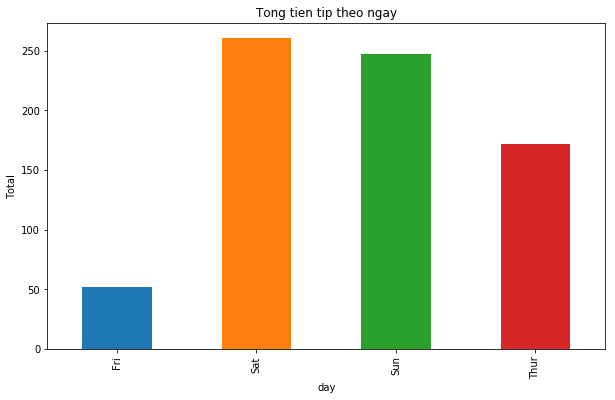

In [106]:
import matplotlib.pyplot as plt

# 1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
plt.figure(figsize=(10, 6))
total_tip_by_day = df.groupby('day')['tip'].sum()
total_tip_by_day.plot(kind='bar')
plt.xlabel('day')
plt.ylabel('Total')
plt.title('Tong tien tip theo ngay')
plt.show()

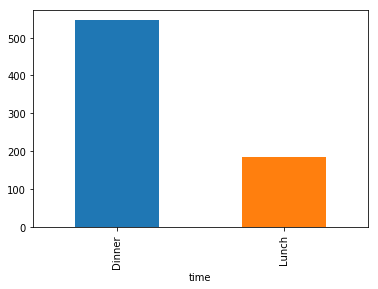

In [ ]:
# 2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
total_tip_by_time = df.groupby('time')['tip'].sum()
total_tip_by_time.plot(kind='bar')

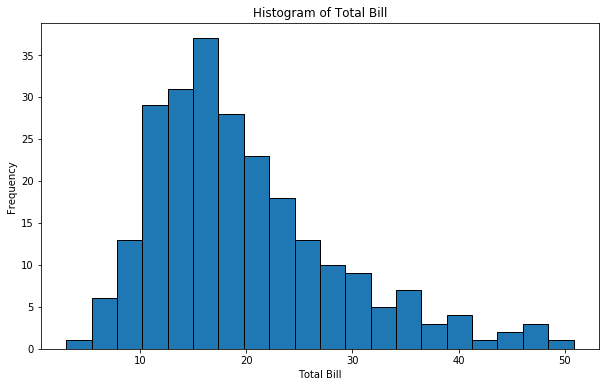

In [110]:
# 3. Vẽ đồ thị histogram của tổng hoá đơn
plt.figure(figsize=(10, 6))
plt.hist(df['total_bill'], bins=20, edgecolor='black')
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bill')
plt.show()

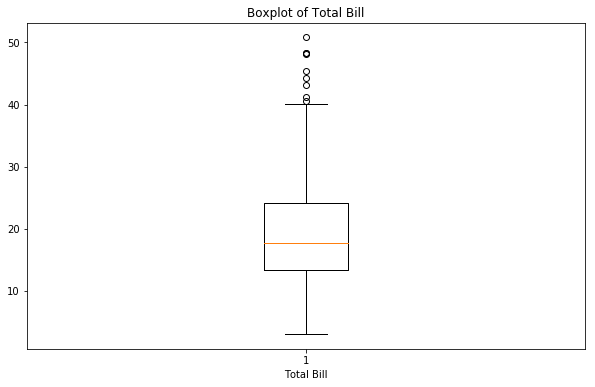

In [111]:
# 4. Vẽ đồ thị boxplot của tổng hoá đơn
plt.figure(figsize=(10, 6))
plt.boxplot(df['total_bill'])
plt.xlabel('Total Bill')
plt.title('Boxplot of Total Bill')
plt.show()

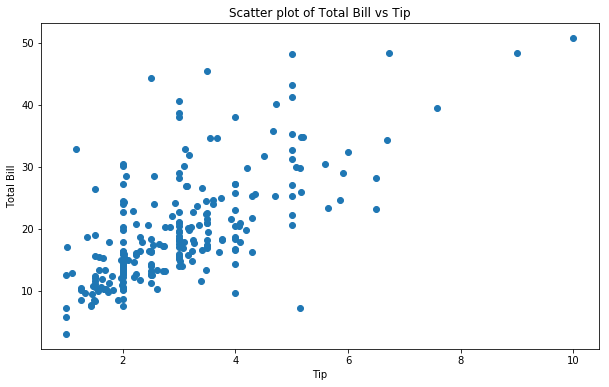

In [113]:
# 5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
plt.figure(figsize=(10, 6))
plt.scatter(data=df, x='tip', y='total_bill')
plt.xlabel('Tip')
plt.ylabel('Total Bill')
plt.title('Scatter plot of Total Bill vs Tip')
plt.show()

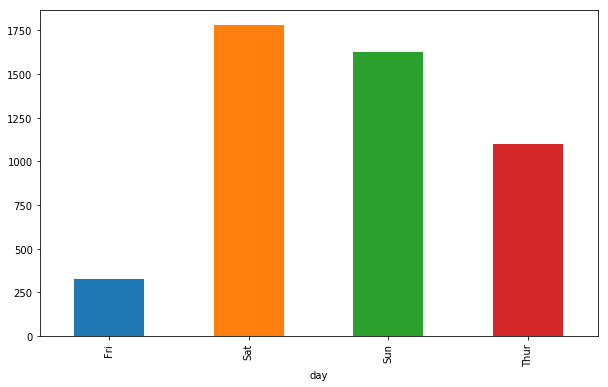

In [114]:
# 6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.
total_bill_sum_per_day = df.groupby('day')['total_bill'].sum()
plt.figure(figsize=(10, 6))
total_bill_sum_per_day.plot(kind='bar')

([<matplotlib.patches.Wedge at 0x2323a0ecd30>,
 [Text(-0.4012471747910624, 1.0242073543585746, 'No'),
  Text(0.4012470788978477, -1.024207391926042, 'Yes')],
 [Text(-0.2188620953405795, 0.5586585569228588, '61.9%'),
  Text(0.21886204303518964, -0.5586585774142045, '38.1%')])

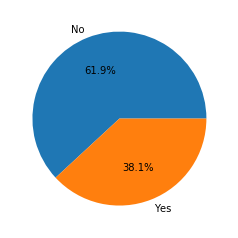

In [121]:
smoker_counts = df.smoker.value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%')

## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn

In [122]:
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
plt.figure(figsize=(10, 6))
sns.barplot(x=total_tip_by_day.index, y=total_tip_by_day.values)
plt.xlabel('Day')
plt.ylabel('Total Tip')
plt.title('Total Tip by Day')
plt.show()

# 2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
plt.figure(figsize=(10, 6))
sns.barplot(x=total_tip_by_time.index, y=total_tip_by_time.values)
plt.xlabel('Time')
plt.ylabel('Total Tip')
plt.title('Total Tip by Time')
plt.show()

# 3. Vẽ đồ thị histogram của tổng hoá đơn
plt.figure(figsize=(10, 6))
sns.distplot(df['total_bill'], bins=20, kde=True)
plt.xlabel('Total Bill')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bill')
plt.show()

# 4. Vẽ đồ thị boxplot của tổng hoá đơn
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['total_bill'])
plt.xlabel('Total Bill')
plt.title('Boxplot of Total Bill')
plt.show()

# 5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='tip', y='total_bill')
plt.xlabel('Tip')
plt.ylabel('Total Bill')
plt.title('Scatter plot of Total Bill vs Tip')
plt.show()

# 6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần
plt.figure(figsize=(10, 6))
sns.barplot(x=total_bill_sum_per_day.index, y=total_bill_sum_per_day.values)
plt.xlabel('Day')
plt.ylabel('Total Bill')
plt.title('Total Bill by Day')
plt.show()

In [5]:
import matplotlib.pyplot as plt

ImportError: cannot import name 'cbook' from 'matplotlib' (d:\Download\App\Anaconda3\lib\site-packages\matplotlib\__init__.py)

In [7]:
import seaborn as sns
print(sns.__version__)


ImportError: cannot import name 'cbook' from 'matplotlib' (d:\Download\App\Anaconda3\lib\site-packages\matplotlib\__init__.py)